#### Jueves 8 de mayo de 2025

## Árbol de Decisión. Gini VS Entropía. ¿Superhéroe o Villano?

In [12]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [13]:
# Datos
nombres = ['Batman', 'Joker', 'Superman', 'Lex Luthor', 'Wonder Woman']
capa = ['Sí', 'No', 'Sí', 'No', 'Sí']
poderes = ['No', 'No', 'Sí', 'No', 'Sí']
inteligencia = ['Alta', 'Alta', 'Media', 'Alta', 'Alta']
clase = ['Superhéroe', 'Villano', 'Superhéroe', 'Villano', 'Superhéroe']

In [14]:
# Codificamos
# Capa: 1=Sí 0=No
# Poderes: 1=Sí 0=No
# Inteligencia: 1=Alta 0=Media
X = [[1, 0, 1], 
    [0, 0, 1],
    [1, 1, 0],
    [0, 0, 1],
    [1, 1, 1]]
y = clase

In [15]:
# Árbol con GINI
arbol_gini = DecisionTreeClassifier(
    criterion='gini', 
    random_state=0
)

arbol_gini.fit(X, y)

print("Profundidad real del árbol:", arbol_gini.get_depth())
print("Número de hojas:", arbol_gini.get_n_leaves())

Profundidad real del árbol: 1
Número de hojas: 2


In [16]:
# Árbol con ENTROPÍA
arbol_entropia = DecisionTreeClassifier(
    criterion='entropy', 
    random_state=0
)
arbol_entropia.fit(X, y)

DecisionTreeClassifier(criterion='entropy', random_state=0)

### Árbol de Decisión

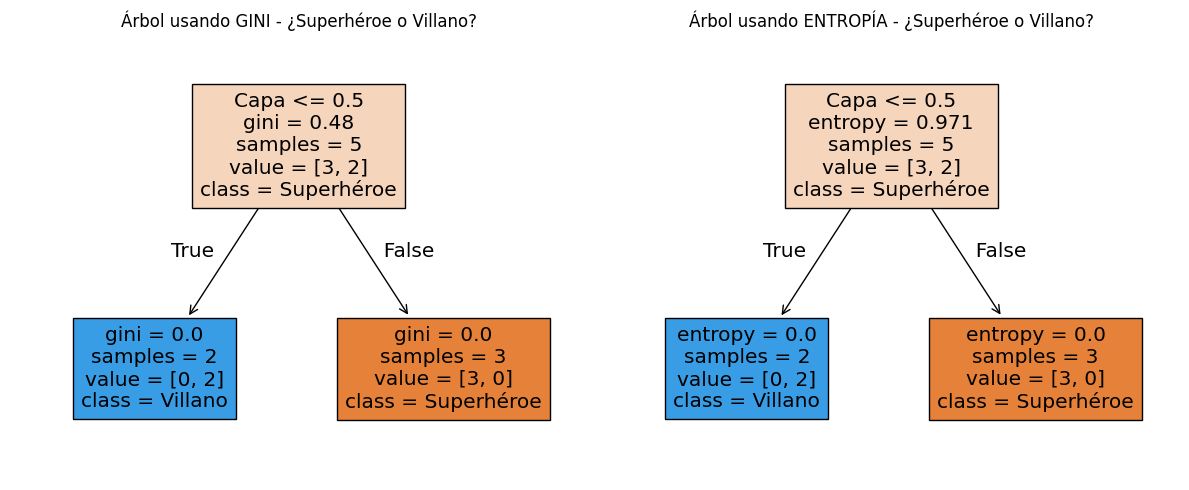

In [17]:
# Mostramos ambos árboles
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1) # Subplot para el árbol con GINI
#subplot es una función de matplotlib que permite crear múltiples gráficos en una sola figura
# plt.subplot(n_rows, n_columns, plot_index)
plot_tree(arbol_gini, feature_names=['Capa', 'Poderes', 'Inteligencia'], class_names=arbol_gini.classes_, filled=True)
plt.title("Árbol usando GINI - ¿Superhéroe o Villano?")

plt.subplot(1, 2, 2) # Subplot para el árbol con ENTROPÍA
plot_tree(arbol_entropia, feature_names=['Capa', 'Poderes', 'Inteligencia'], class_names=arbol_entropia.classes_, filled=True)
plt.title("Árbol usando ENTROPÍA - ¿Superhéroe o Villano?")

plt.tight_layout()
plt.show()

### Predicciones

In [18]:
# Capa: 1=Sí 0=No
# Poderes: 1=Sí 0=No
# Inteligencia: 1=Alta 0=Media
nuevo_personaje = [[1, 1, 0]]

#Etiquetas para mostrar en texto
etiquetas_personaje = ['Capa', 'Poderes', 'Inteligencia']

#Predicciones con árbol GINI
predicciones_gini = arbol_gini.predict(nuevo_personaje)

#Predicciones con árbol ENTROPÍA
predicciones_entropia = arbol_entropia.predict(nuevo_personaje)

#Resultados GINI
print("\nPREDICCIÓN CON GINI- ¿Superhéroe o Villano? si...?\n")
for etiqueta, pred in zip(etiquetas_personaje, nuevo_personaje[0]):
    print(f"{etiqueta} -> {'Sí' if pred == 1 else 'No'}")

print(f"\nClase -> {predicciones_gini[0]}")

#Resultados ENTROPÍA
print("\n\nPREDICCIÓN CON ENTROPÍA- ¿Superhéroe o Villano? si...?\n")
for etiqueta, pred in zip(etiquetas_personaje, nuevo_personaje[0]):
    print(f"{etiqueta} -> {'Sí' if pred == 1 else 'No'}")

print(f"\nClase -> {predicciones_entropia[0]}")


PREDICCIÓN CON GINI- ¿Superhéroe o Villano? si...?

Capa -> Sí
Poderes -> Sí
Inteligencia -> No

Clase -> Superhéroe


PREDICCIÓN CON ENTROPÍA- ¿Superhéroe o Villano? si...?

Capa -> Sí
Poderes -> Sí
Inteligencia -> No

Clase -> Superhéroe


In [22]:
# Importancia de cada atributo

# feature_importances_: muestra la importancia de cada característica en el modelo. 
# Cuanto mayor sea el valor, más relevante es esa característica para las decisiones del árbol de decisión.

importancias = arbol_gini.feature_importances_ 

print("\nImportancia de cada atributo\n")
for atributo, importancia in sorted(zip(['Capa', 'Poderes', 'Inteligencia'], importancias)):
    print(f"{atributo} -> {importancia}")


Importancia de cada atributo

Capa -> 1.0
Inteligencia -> 0.0
Poderes -> 0.0


#### ¿Cuál es el mejor atributo para la raíz? ¿Cómo cambia el árbol si añades a "Wonder Woman" (Sí, Sí, Alta, Superhéroe)?

In [23]:
#El mejor atributo es capa
#Al añadir un nuevo personaje, el árbol permanece igual, ya que solo esta evaluando uno más, podría haber cambiado
#si se agregarin nuevo atributos.
